<a href="https://colab.research.google.com/github/ramrajv/CNN_Assignment/blob/main/ramraj_vasudevan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification Model using a custom CNN in Tensorflow

## <u>Problem Statement</u>: 
### <font color=green>*To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.* </font>

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
tf.__version__

'2.8.0'

### Define the path to train and test images

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

0
0


## Created Train & Validation Dataset with batch size of 32 / Resize images to 180 * 180

In [4]:
batch_size = 32
img_height = 180
img_width = 180

### Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize one instance of all the nine classes present in the dataset

0 vascular lesion
1 nevus
2 pigmented benign keratosis
3 melanoma
4 dermatofibroma
5 actinic keratosis
6 basal cell carcinoma
7 squamous cell carcinoma
8 seborrheic keratosis


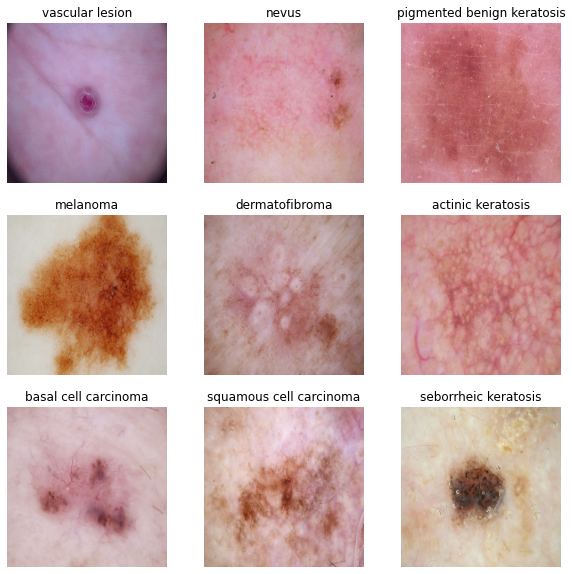

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
class_seen = []
image_count = 0
for images, labels in train_ds.take(10):
    for i in range(32):
        if class_names[labels[i]] not in class_seen:
            print(image_count, class_names[labels[i]])
            ax = plt.subplot(3, 3, image_count + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            class_seen.append(class_names[labels[i]])
            image_count += 1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create CNN model to detect 9 classes

In [ ]:
### Your code goes here
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 74ms/step - loss: 2.2484 - accuracy: 0.1999 - val_loss: 1.8441 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 1s 18ms/step - loss: 1.7779 - accuracy: 0.3519 - val_loss: 1.6271 - val_accuracy: 0.4362
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 1.5855 - accuracy: 0.4358 - val_loss: 1.4879 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4393 - accuracy: 0.5020 - val_loss: 1.4196 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 1s 18ms/step - loss: 1.3085 - accuracy: 0.5388 - val_loss: 1.4253 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 1s 18ms/step - loss: 1.1951 - accuracy: 0.5807 - val_loss: 1.3027 - val_accuracy: 0.5638
Epoch 7/20
56/56 [==============================] - 1s 18ms/step - loss: 1.0926 - accuracy: 0.6128 - val_loss: 1.4709 - val_accuracy: 0.4720
Epoch 8/20
5

### Visualizing training results

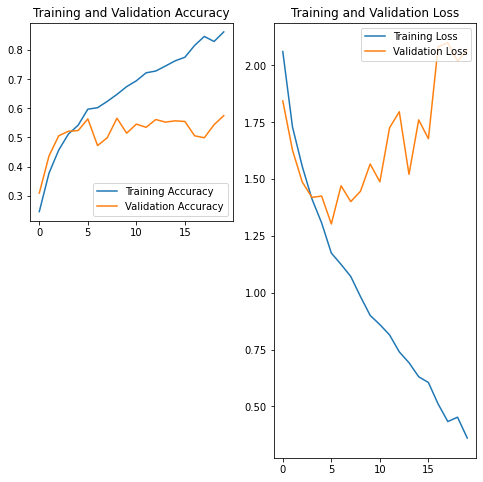

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### <u> Observations :- </u>
#### The training accuracy is over 90% but the validation accuracy is just 50%
#### Similarly, the training loss is just 0.2 while the validation loss is 2.4
#### The above graph also shows the same trend with Training Loss continuously reduces, but the Validation Loss starts increasing after a few epochs.

### <font color=red> The Model is overfitting the data </font>

## Data Augmentation to Resolve Overfitting

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

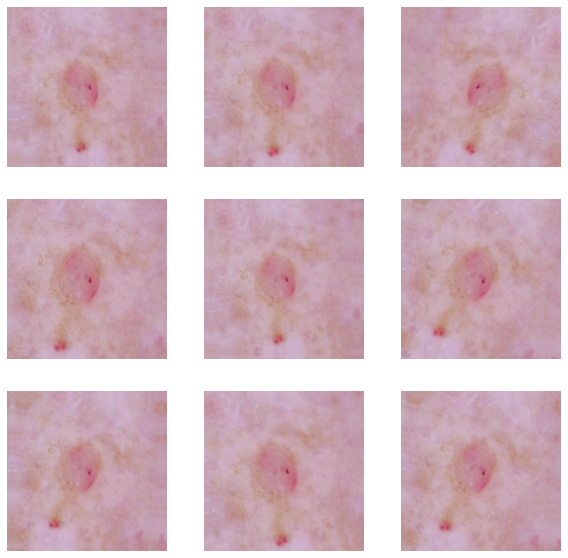

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Create CNN model with Dropout

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 24ms/step - loss: 2.1237 - accuracy: 0.1954 - val_loss: 1.9065 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.8711 - accuracy: 0.3120 - val_loss: 1.6653 - val_accuracy: 0.4228
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.5835 - accuracy: 0.4377 - val_loss: 1.4925 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4759 - accuracy: 0.4902 - val_loss: 1.5318 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4590 - accuracy: 0.4941 - val_loss: 1.3396 - val_accuracy: 0.5503
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3244 - accuracy: 0.5416 - val_loss: 1.3405 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2646 - accuracy: 0.5509 - val_loss: 1.5322 - val_accuracy: 0.4922
Epoch 8/20
56

### Visualizing the results

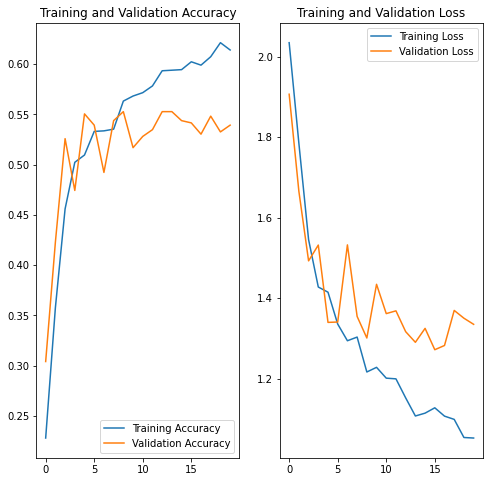

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### <u> Observations :- </u>
#### The model is no longer overfitting as much as the previous model. Slight Overfitting still exists.
#### However, the training accuracy has significantly reduced to 61%.
#### The validation accuracy is 54%.
#### The above graph also shows the same trend with Training Loss and Validation Loss reducing together.

### <font color=red> Overall, this model is better as overfitting has been reduced. However, it is still slightly overfitting. </font>

## Examine the Current Class Distribution

                            count  percentage
pigmented benign keratosis    462        20.6
melanoma                      438        19.6
basal cell carcinoma          376        16.8
nevus                         357        15.9
squamous cell carcinoma       181         8.1
vascular lesion               139         6.2
actinic keratosis             114         5.1
dermatofibroma                 95         4.2
seborrheic keratosis           77         3.4


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

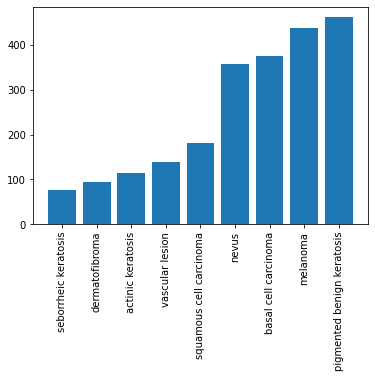

In [ ]:
## Your code goes here.
class_count = {}
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
for i in class_names:
    data_dir = pathlib.Path(path_to_training_dataset + i)
    image_count = len(list(data_dir.glob('*.jpg')))
    class_count[i] = image_count

df = pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count'], ascending=False))

class_count = {k: v for k, v in sorted(class_count.items(), key=lambda item: item[1])}
plt.bar(class_count.keys(), height=class_count.values())
plt.xticks(rotation=90)

### <u> Observations :- </u>

#### - Which class has the least number of samples?
- #### <font color=blue>'seborrheic keratosis' with 77 images (3.4%) </font> has the least number of sample images.
- #### <font color=blue>'dermatofibroma' (95, 4.2%), 'actinic keratosis' (114, 5.1%) and 'vascular lesion' (139, 6.2%) </font>  also have limited samples.

#### - Which classes dominate the data in terms proportionate number of samples?
- #### <font color=blue> 'pigmented benign keratosis' (462, 20.6%) and 'melanoma'(438, 19.6)</font> samples dominate the dataset.
- #### <font color=blue> 'nevus'(357, 15.9%) and 'basal cell carcinoma'(376, 16.8%)</font> also have a large proportion of samples.

## Rectify Class Imbalance using Augmentor

In [ ]:
!pip install Augmentor

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500, multi_threaded=False) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing ISIC_0026865.jpg:   1%|          | 6/500 [00:00<00:17, 27.93 Samples/s]

Initialised with 376 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing ISIC_0032941.jpg:   1%|          | 5/500 [00:00<00:17, 28.53 Samples/s]

Initialised with 95 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing ISIC_0010423.jpg:   0%|          | 2/500 [00:00<00:36, 13.72 Samples/s]

Initialised with 438 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing ISIC_0026212.jpg:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing ISIC_0026679.jpg:   1%|          | 5/500 [00:00<00:16, 29.57 Samples/s]

Initialised with 462 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing ISIC_0010993.jpg:   0%|          | 1/500 [00:00<00:59,  8.37 Samples/s]

Initialised with 77 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing ISIC_0030297.jpg:   1%|          | 4/500 [00:00<00:16, 29.78 Samples/s]

Initialised with 181 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing ISIC_0026713.jpg:   1%|          | 4/500 [00:00<00:17, 28.83 Samples/s]

Initialised with 139 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing ISIC_0033749.jpg: 100%|██████████| 500/500 [00:17<00:00, 28.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

## Class Distribution after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(f'Original count of images within train/class folder: {len(path_list)}')
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(f'Total augmented images within train/class/output folder: {len(path_list_new)}')

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict = dict(zip(path_list, lesion_list))

Original count of images within train/class folder: 2239
Total augmented images within train/class/output folder: 4500


In [ ]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

                            count  percentage
pigmented benign keratosis    962        14.3
melanoma                      938        13.9
basal cell carcinoma          876        13.0
nevus                         857        12.7
squamous cell carcinoma       681        10.1
vascular lesion               639         9.5
actinic keratosis             614         9.1
dermatofibroma                595         8.8
seborrheic keratosis          577         8.6


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

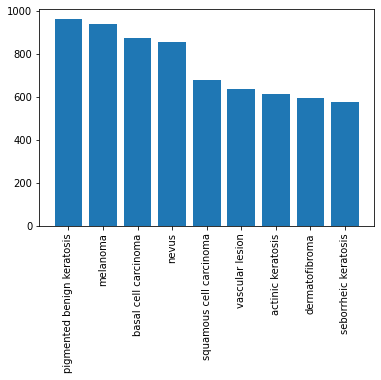

In [ ]:
class_count = dict(new_df['Label'].value_counts())

df = pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count'], ascending=False))

plt.bar(class_count.keys(), height=class_count.values())
plt.xticks(rotation=90)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### <u> Observations :- </u>

#### Classes with very less samples :-
- #### <font color=blue>'seborrheic keratosis' has increased from 3.4% to 8.6% </font>
- #### <font color=blue>'dermatofibroma' has increased from 4.2% to 8.8% </font>
- #### <font color=blue>'actinic keratosis' has increased from 5.1% to 9.1%</font>
- #### <font color=blue> 'vascular lesion' has increased from 6.2% to 9.5%</font>

#### Classes dominating the data :-
- #### <font color=blue> 'pigmented benign keratosis' has reduced from 20.6% to 14.3%</font>
- #### <font color=blue> 'melanoma' has reduced from 19.6 to 13.9%</font>
- #### <font color=blue> 'basal cell carcinoma' has reduced from 16.8% to 13%</font>
- #### <font color=blue> 'nevus' has reduced from 15.9% to 12.7%</font>

### <font color=red> As can be seen, the dataset is more balanced and no class is dominating the sample dataset.</font>

## Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

###  Create a training dataset

In [ ]:
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create CNN model (including normalization)

In [ ]:
## your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train your model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 27s 153ms/step - loss: 3.6175 - accuracy: 0.2539 - val_loss: 5.3691 - val_accuracy: 0.1210
Epoch 2/30
169/169 [==============================] - 26s 150ms/step - loss: 1.7291 - accuracy: 0.3369 - val_loss: 5.3832 - val_accuracy: 0.1552
Epoch 3/30
169/169 [==============================] - 26s 149ms/step - loss: 1.6346 - accuracy: 0.3692 - val_loss: 3.3525 - val_accuracy: 0.1952
Epoch 4/30
169/169 [==============================] - 26s 151ms/step - loss: 1.5155 - accuracy: 0.4049 - val_loss: 3.3274 - val_accuracy: 0.3385
Epoch 5/30
169/169 [==============================] - 26s 151ms/step - loss: 1.4318 - accuracy: 0.4469 - val_loss: 1.7205 - val_accuracy: 0.4246
Epoch 6/30
169/169 [==============================] - 26s 150ms/step - loss: 1.4045 - accuracy: 0.4617 - val_loss: 1.6624 - val_accuracy: 0.4350
Epoch 7/30
169/169 [==============================] - 27s 153ms/step - loss: 1.3430 - accuracy: 0.4746 - val_loss: 1.7338 - val_ac

###  Visualize the model results

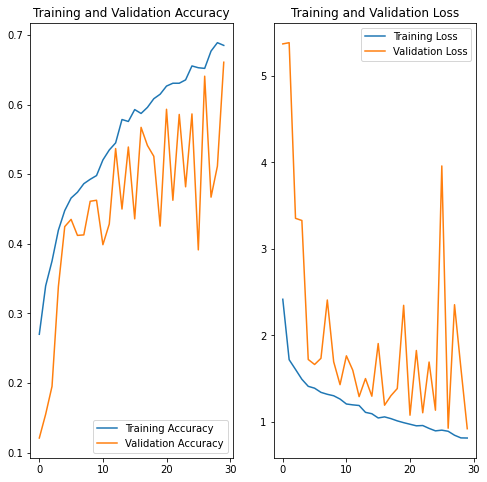

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## <u> Observations</u> :- 

- ### <font color=blue>The training accuracy has increased to 68% from 60%. </font>
- ### <font color=blue>The final validation accuracy has increased to 66%. Without rebalancing, it was 54%.</font>
- ### <font color=blue>It is observed that the validation loss is also fluctuating much more.</font>

## <u> Conclusion</u> :-
- ### <font color=red>Therefore, the results indicate that the class rebalance has helped to improve the results.</font>
- ### <font color=red>After class rebalance, the model is a more accurate.</font>
- ### <font color=red>The model is not overfitting or underfitting the data.</font>